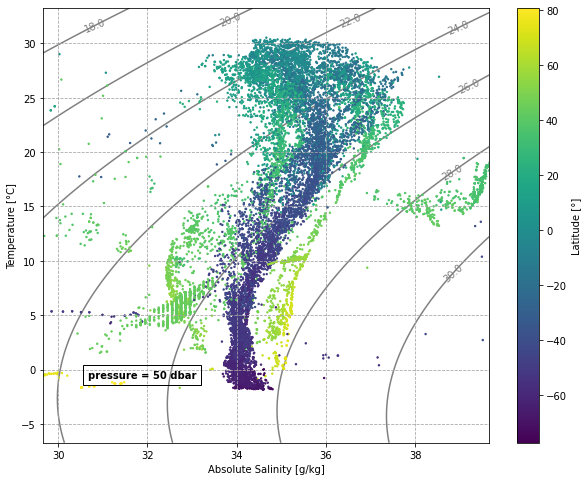

In [2]:
import numpy as np
import gsw.conversions
import numpy.matlib
import matplotlib.pyplot as plt
from netCDF4 import *
import paramTSz as func
import math

ds = Dataset('EN.4.2.1.f.profiles.g10.201901.nc')
    
# temperature (in degC)
T = ds.variables['TEMP'][:]

# practical salinity
PSAL = ds.variables['PSAL_CORRECTED'][:]

# depth
depth = ds.variables['DEPH_CORRECTED'][:]
    
lat = ds.variables['LATITUDE'][:]
long = ds.variables['LONGITUDE'][:]


def diagramTS(T, SP, depth, long, lat, p_layer):
    # Pressure from depth 
    p = gsw.p_from_z(-depth, np.matlib.repmat(lat,len(T[1,:]),1).T) # [dbar]
    
    # Absolute Salinity from Practical Salinity
    SA = gsw.SA_from_SP(SP, p, np.matlib.repmat(long,len(T[1,:]),1).T, np.matlib.repmat(lat,len(T[1,:]),1).T) # [g/kg]
    
    p_find = np.where((p > p_layer-1) & (p < p_layer+1))
    
    medS = np.median(SA[p_find])
    medT = np.median(T[p_find])
    
    tempL=np.linspace(medT-20, medT+20, 200)
    salL=np.linspace(medS-5, medS+5, 200)
    
    Tg, Sg = np.meshgrid(tempL,salL)
    sigma_theta = gsw.sigma0(Sg, Tg)

    cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),500)
    marker_size=2
    fig,ax=plt.subplots(figsize=(10,8))
    plt.xlim([medS-5, medS+5])
    plt.ylim([medT-20, medT+20])
    cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1)
    cl=plt.clabel(cs,fontsize=10,inline=False,fmt='%.1f')
    plt.scatter(SA[p_find], T[p_find], marker_size, c=lat[p_find[0]])
    plt.xlabel("Absolute Salinity [g/kg]")
    plt.ylabel("Temperature [°C]")
    plt.grid(b=True, which='both', color='0.65', linestyle='--')
    cbar= plt.colorbar()
    cbar.set_label("Latitude [°]")
    plt.text(medS-4, medT-14, 'pressure = '+str(p_layer)+' dbar', weight='bold', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=5))

    return

diagramTS(T, PSAL, depth, long, lat, 50)